<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Life-Expectancy-Project:-Sourcing-&amp;-Analyzing-Time-Series-Data" data-toc-modified-id="Life-Expectancy-Project:-Sourcing-&amp;-Analyzing-Time-Series-Data-1">Life Expectancy Project: Sourcing &amp; Analyzing Time Series Data</a></span><ul class="toc-item"><li><span><a href="#01-Import-libraries-and-data" data-toc-modified-id="01-Import-libraries-and-data-1.1">01 Import libraries and data</a></span></li><li><span><a href="#02-Data-wrangling-and-consistency-checks" data-toc-modified-id="02-Data-wrangling-and-consistency-checks-1.2">02 Data wrangling and consistency checks</a></span><ul class="toc-item"><li><span><a href="#Shape-and-size-of-data" data-toc-modified-id="Shape-and-size-of-data-1.2.1">Shape and size of data</a></span></li><li><span><a href="#List-variables-of-data-set" data-toc-modified-id="List-variables-of-data-set-1.2.2">List variables of data set</a></span></li><li><span><a href="#Check-for-mixed-data-type" data-toc-modified-id="Check-for-mixed-data-type-1.2.3">Check for mixed data type</a></span></li><li><span><a href="#Check-for-missing-values" data-toc-modified-id="Check-for-missing-values-1.2.4">Check for missing values</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-1.2.5">Check for duplicates</a></span></li></ul></li><li><span><a href="#03-Create-subset-of-df-for-time-series-analysis" data-toc-modified-id="03-Create-subset-of-df-for-time-series-analysis-1.3">03 Create subset of df for time series analysis</a></span><ul class="toc-item"><li><span><a href="#Create-avg_life_expectancy-column-grouped-by-year" data-toc-modified-id="Create-avg_life_expectancy-column-grouped-by-year-1.3.1">Create avg_life_expectancy column grouped by year</a></span></li><li><span><a href="#Create-new-data-frame-with-only-year-and-avg_life_expectancy-columns" data-toc-modified-id="Create-new-data-frame-with-only-year-and-avg_life_expectancy-columns-1.3.2">Create new data frame with only year and avg_life_expectancy columns</a></span></li></ul></li><li><span><a href="#04-Time-series-analysis:-decomposition" data-toc-modified-id="04-Time-series-analysis:-decomposition-1.4">04 Time-series analysis: decomposition</a></span></li><li><span><a href="#05-Testing-for-stationarity" data-toc-modified-id="05-Testing-for-stationarity-1.5">05 Testing for stationarity</a></span></li><li><span><a href="#06-Stationarizing-the-Average-Life-Expectancy-data" data-toc-modified-id="06-Stationarizing-the-Average-Life-Expectancy-data-1.6">06 Stationarizing the Average Life Expectancy data</a></span><ul class="toc-item"><li><span><a href="#Second-round-of-differencing" data-toc-modified-id="Second-round-of-differencing-1.6.1">Second round of differencing</a></span></li></ul></li></ul></li></ul></div>

# Life Expectancy Project: Sourcing & Analyzing Time Series Data

## 01 Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# Create path

path = r'C:\Users\rober_fjs0dbr\OneDrive\Documents\CF Coursework\Advanced Analytics & Dashboard Design\rc_final_project'

In [3]:
# Import life expectancy data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'carbon_life_full_v03.csv'))

In [4]:
df.head()

,Unnamed: 0,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,...,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag
0,0,Afghanistan,1990,50.331001,NaN,10694804,NaN,1.306598e+10,NaN,1221.713273,...,2024000.0,NaN,0.189251,NaN,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
1,1,Afghanistan,1991,50.999001,1.327212,10745168,0.470920,1.204736e+10,-7.795983,1121.188803,...,1914000.0,-5.434783,0.178127,-5.878022,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
2,2,Afghanistan,1992,51.640999,1.258845,12057436,12.212634,1.267754e+10,5.230828,1051.429078,...,1482000.0,-22.570533,0.122912,-30.997549,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
3,3,Afghanistan,1993,52.256001,1.190917,14003764,16.142138,9.834581e+09,-22.425156,702.281258,...,1487000.0,0.337382,0.106186,-13.608116,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita
4,4,Afghanistan,1994,52.841999,1.121400,15455560,10.367184,7.919857e+09,-19.469298,512.427706,...,1454000.0,-2.219233,0.094076,-11.404130,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita


In [5]:
# Drop 'Unnamed: 0' column from df

df = df.drop(['Unnamed: 0'], axis=1)

## 02 Data wrangling and consistency checks

### Shape and size of data

In [6]:
# shape of df data

df.shape

(4691, 20)

### List variables of data set

In [7]:
# iterating the columns in df

for col in df.columns:
    print(col)

country
year
life_expectancy
pct_change_life
population
pct_change_pop
gdp
pct_change_gdp
gdp_per_capita
pct_change_gdp_capita
co2
pct_change_co2
co2_per_capita
pct_change_co2_capita
life_expectancy_flag
population_flag
gdp_flag
gdp_capita_flag
co2_production_flag
co2_per_capita_flag


### Check for mixed data type

In [8]:
# check for mixed data types in df

for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

No mixed data types found in df

### Check for missing values

In [9]:
# check for missing values in df

df.isnull().sum()

country                  0
year                     0
life_expectancy          0
pct_change_life          1
population               0
pct_change_pop           1
gdp                      0
pct_change_gdp           1
gdp_per_capita           0
pct_change_gdp_capita    1
co2                      0
pct_change_co2           1
co2_per_capita           0
pct_change_co2_capita    1
life_expectancy_flag     0
population_flag          0
gdp_flag                 0
gdp_capita_flag          0
co2_production_flag      0
co2_per_capita_flag      0
dtype: int64

Missing values in pct_change columns expected for earliest year

### Check for duplicates

In [10]:
# check for duplicates in df_life

df_dups = df[df.duplicated()]

df_dups

,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag


No duplicates found in df

## 03 Create subset of df for time series analysis

### Create avg_life_expectancy column grouped by year

In [39]:
df['avg_life_expectancy'] = df.groupby(['year'])['life_expectancy'].transform('mean')

df.head()

,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,...,pct_change_co2,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,avg_life_expectancy
0,Afghanistan,1990,50.331001,NaN,10694804,NaN,1.306598e+10,NaN,1221.713273,NaN,...,NaN,0.189251,NaN,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,64.874428
1,Afghanistan,1991,50.999001,1.327212,10745168,0.470920,1.204736e+10,-7.795983,1121.188803,-8.228156,...,-5.434783,0.178127,-5.878022,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,65.016679
2,Afghanistan,1992,51.640999,1.258845,12057436,12.212634,1.267754e+10,5.230828,1051.429078,-6.221943,...,-22.570533,0.122912,-30.997549,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,65.142517
3,Afghanistan,1993,52.256001,1.190917,14003764,16.142138,9.834581e+09,-22.425156,702.281258,-33.206978,...,0.337382,0.106186,-13.608116,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,65.183501
4,Afghanistan,1994,52.841999,1.121400,15455560,10.367184,7.919857e+09,-19.469298,512.427706,-27.033834,...,-2.219233,0.094076,-11.404130,Short Life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,65.314619


### Create new data frame with only year and avg_life_expectancy columns

In [40]:
avg_life = df.groupby('year')["avg_life_expectancy"].mean()

avg_life.head(30)

year
1990    64.874428
1991    65.016679
1992    65.142517
1993    65.183501
1994    65.314619
1995    65.438844
1996    65.668151
1997    65.969772
1998    66.067183
1999    66.288994
2000    66.576931
2001    66.865549
2002    67.154509
2003    67.377341
2004    67.763892
2005    68.071248
2006    68.444508
2007    68.816465
2008    69.227441
2009    69.645277
2010    70.046012
2011    70.464918
2012    70.824900
2013    71.193289
2014    71.549472
2015    71.798928
2016    72.102365
2017    72.347326
2018    72.572224
Name: avg_life_expectancy, dtype: float64

In [41]:
# Reset index so that you can use the "Date" column as a filter

avg_life = avg_life.reset_index()

In [42]:
avg_life.head()

,year,avg_life_expectancy
0,1990,64.874428
1,1991,65.016679
2,1992,65.142517
3,1993,65.183501
4,1994,65.314619


In [43]:
# Set the "Date" column as the index

from datetime import datetime


avg_life['datetime'] = pd.to_datetime(avg_life['year'], format='%Y') # Create a datetime column from "year"
avg_life = avg_life.set_index('datetime') # Set the datetime as the index of the dataframe.
avg_life.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
avg_life.head()

,avg_life_expectancy
datetime,
1990-01-01,64.874428
1991-01-01,65.016679
1992-01-01,65.142517
1993-01-01,65.183501
1994-01-01,65.314619


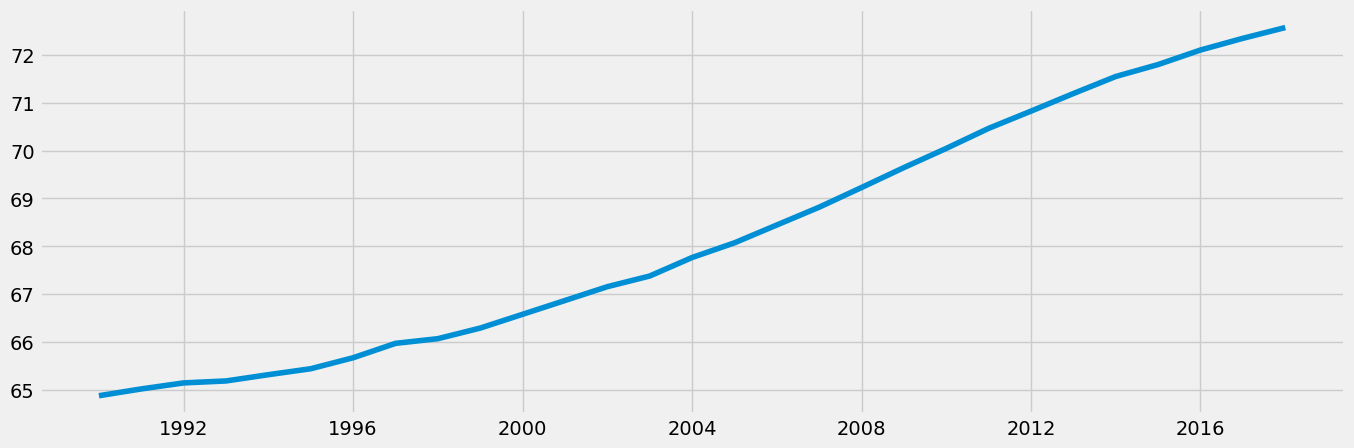

In [44]:
# Plot subset avg_life

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_life)

In [45]:
# Check for missing values

avg_life.isnull().sum() 

avg_life_expectancy    0
dtype: int64

In [46]:
# Check for duplicates

dups = avg_life.duplicated()
dups.sum()


0

## 04 Time-series analysis: decomposition

In [47]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(avg_life, model='additive')

In [48]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

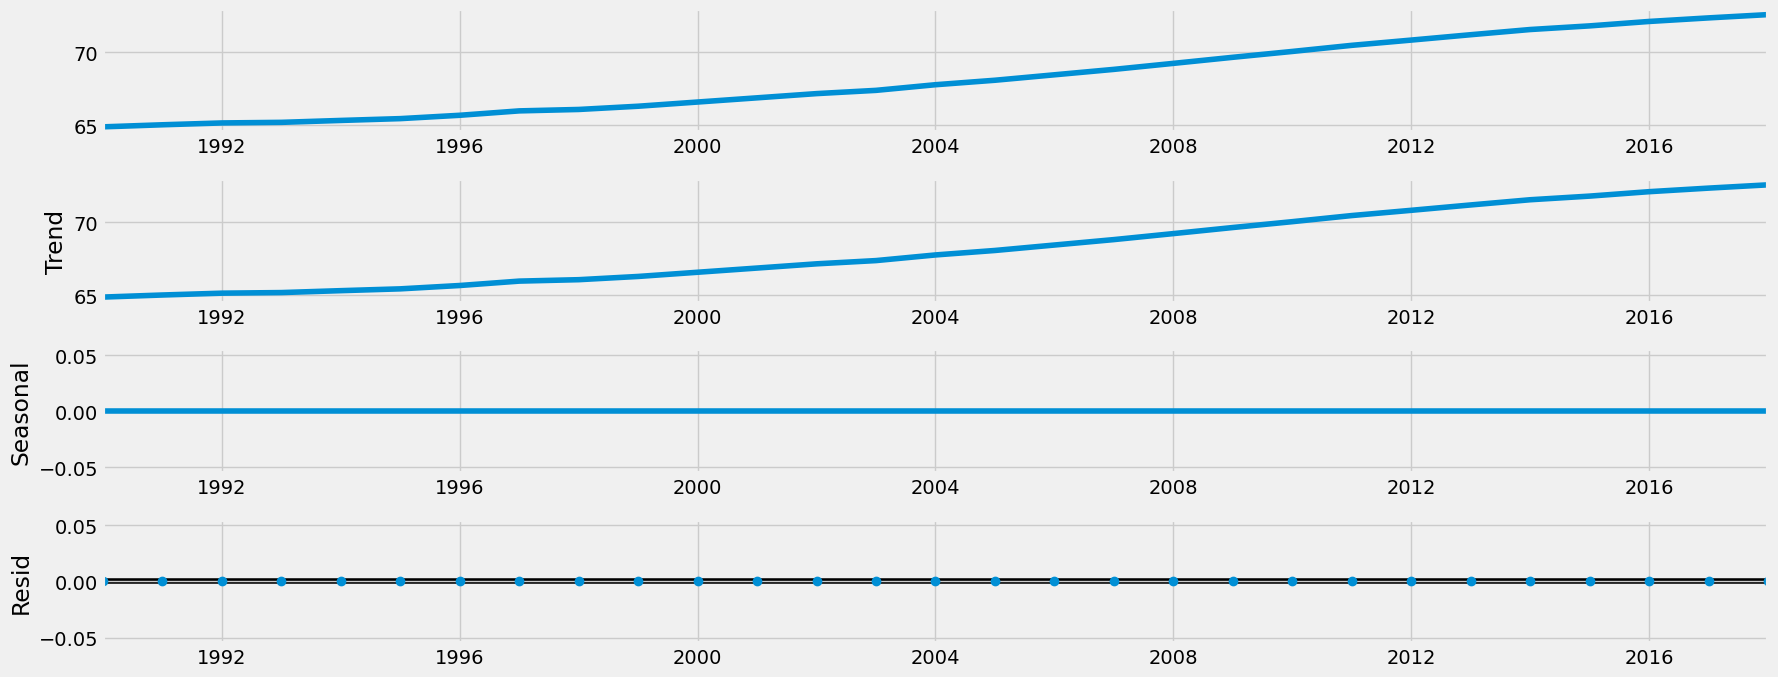

In [49]:
# Plot the separate components

decomposition.plot()
plt.show()

The level and trend appear the same meaning the data does not have a lot of noise and does not need to be smoothed. The trend increases gradually overtime meaning the data is not stationary. No seasonality exists because the season curve is flat. The residual or noise curve is also flat meaning noise does not exist in the data.

## 05 Testing for stationarity

In [51]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(avg_life['avg_life_expectancy'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.046925
p-value                         0.266384
Number of Lags Used             6.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Test statistic of -2.046925 is larger than critical value -3.005426. This does not disprove the null hypothesis that a unit root exists. This means that there is a unit root in the data and the data is non-stationary.

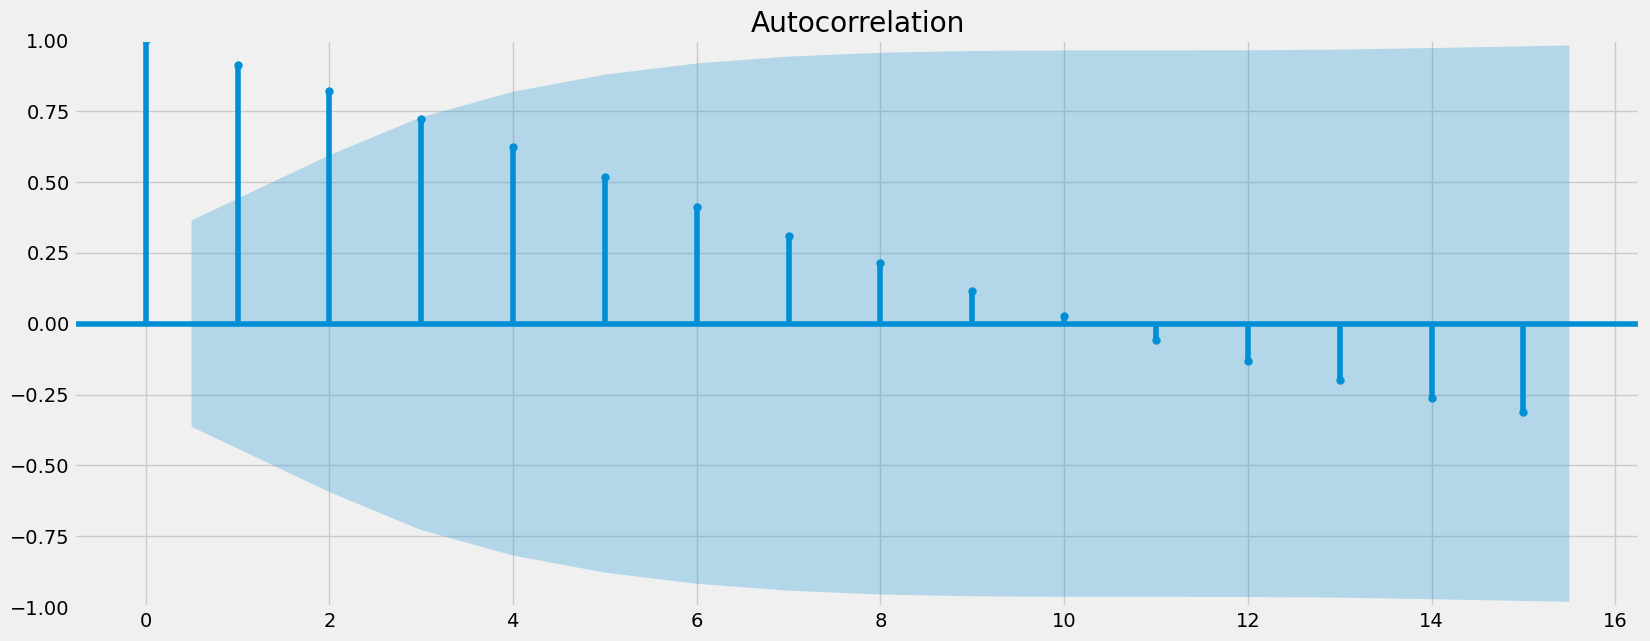

In [52]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(avg_life)
plt.show()

## 06 Stationarizing the Average Life Expectancy data

In [53]:
data_diff = avg_life - avg_life.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [54]:
# remove missing values

data_diff.dropna(inplace = True)

In [55]:
data_diff.head()

,avg_life_expectancy
datetime,
1991-01-01,0.142250
1992-01-01,0.125839
1993-01-01,0.040984
1994-01-01,0.131118
1995-01-01,0.124225


In [56]:
data_diff.columns

Index(['avg_life_expectancy'], dtype='object')

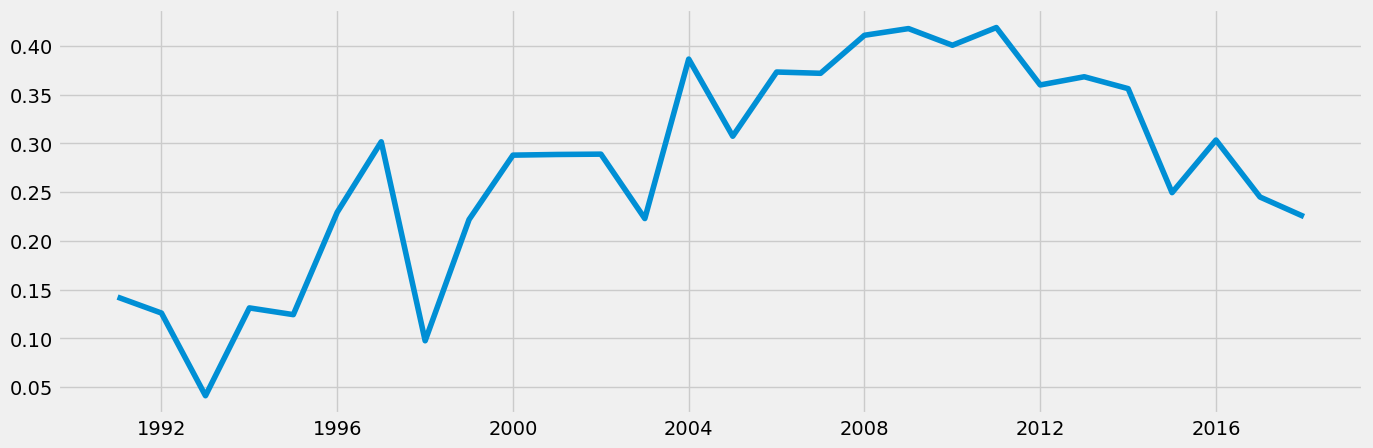

In [57]:
# Plot to observe changes differencing made to time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [58]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.533956
p-value                         0.516652
Number of Lags Used             5.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


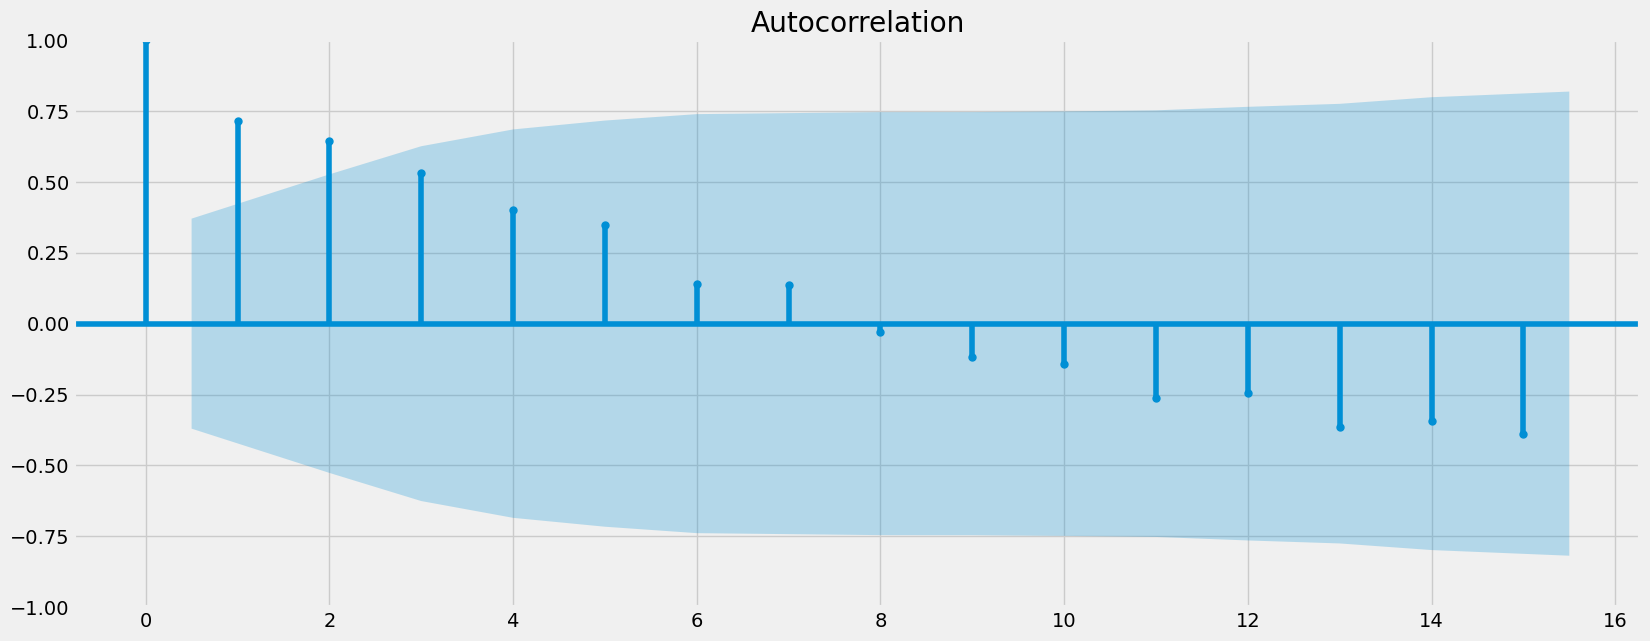

In [59]:
plot_acf(data_diff)
plt.show()

### Second round of differencing

In [60]:
data_diff2 = data_diff - data_diff.shift(1) 

In [61]:
# remove missing values

data_diff2.dropna(inplace = True)

In [62]:
data_diff2.head()

,avg_life_expectancy
datetime,
1992-01-01,-0.016412
1993-01-01,-0.084855
1994-01-01,0.090135
1995-01-01,-0.006893
1996-01-01,0.105082


In [64]:
data_diff2.columns

Index(['avg_life_expectancy'], dtype='object')

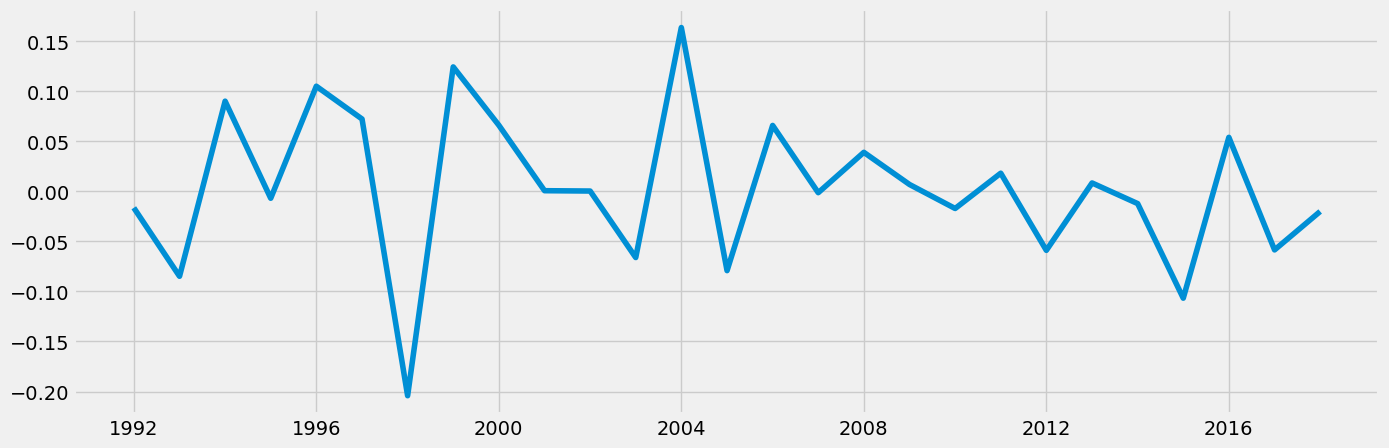

In [65]:
# Plot to observe changes differencing made to time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [66]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.772002
p-value                         0.827208
Number of Lags Used             4.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


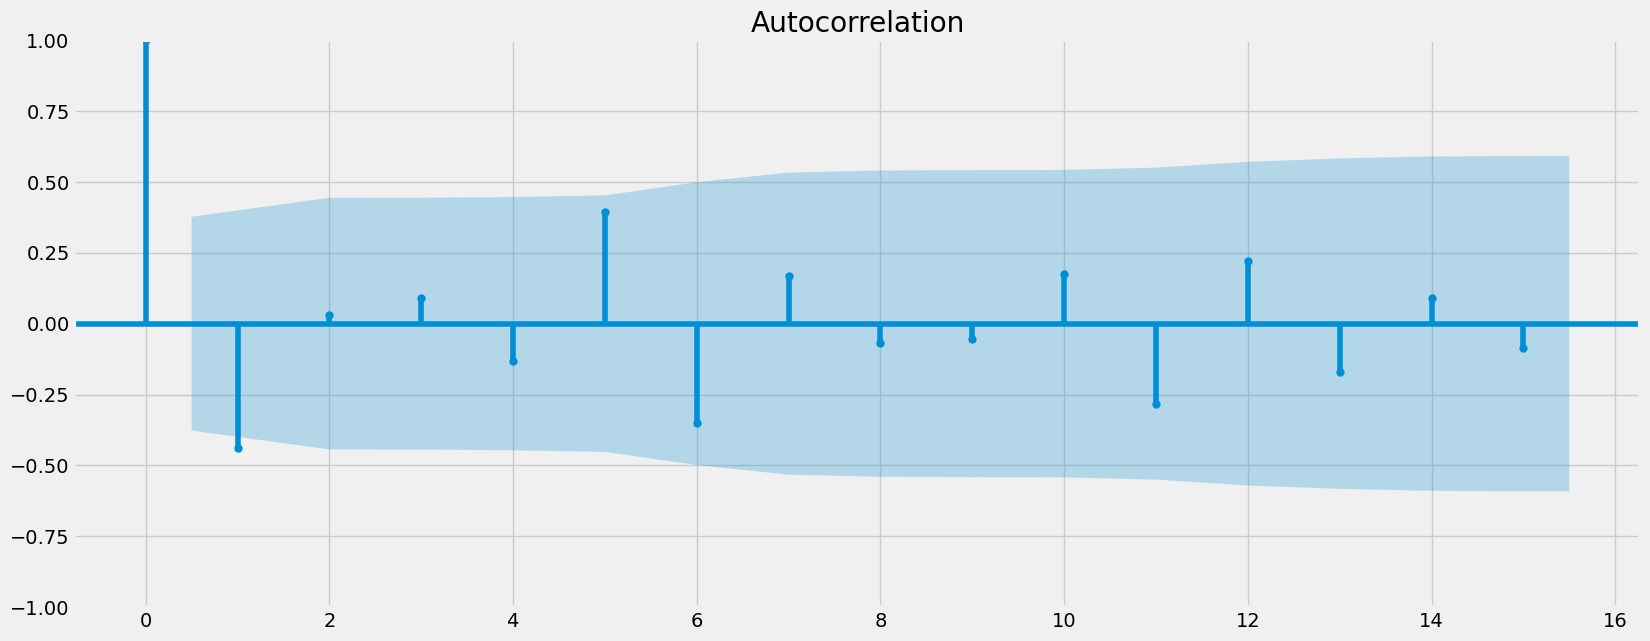

In [67]:
plot_acf(data_diff2)
plt.show()

Based on how the second round of differencing turned out I would have stopped after the first round of differencing because there are only 3 significant lags so a second round was not really necessary. 